# MNIST

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
X = []
Y = []
with open('train.csv', 'r') as f:
    f.readline()
    for line in f:
        data = line.strip().split(',')
        X.append([float(i) for i in data[1:]])
        Y.append(int(data[0]))
        
X = np.array(X)
Y = np.array(Y)

In [3]:
Y.shape

(42000,)

In [4]:
X.shape

(42000, 784)

In [5]:
x = X.reshape(-1, 28,28)[9]

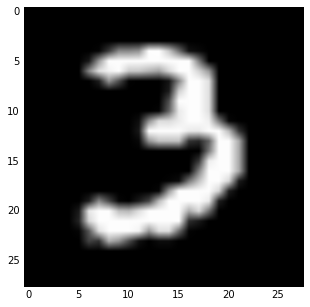

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(x, cmap='gray')
plt.show()

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=7)

In [10]:
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
Y_pred = tree_clf.predict(X_test)

In [12]:
Y_pred.shape

(21000,)

In [13]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.90      0.85      0.87      2075
          1       0.81      0.89      0.85      2361
          2       0.76      0.69      0.73      2079
          3       0.63      0.72      0.67      2186
          4       0.85      0.75      0.80      2028
          5       0.69      0.64      0.66      1910
          6       0.90      0.78      0.83      2092
          7       0.91      0.79      0.84      2192
          8       0.62      0.74      0.68      2012
          9       0.71      0.82      0.76      2065

avg / total       0.78      0.77      0.77     21000



In [14]:
from sklearn.metrics import confusion_matrix

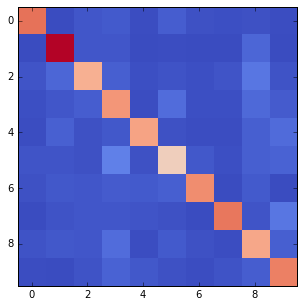

In [22]:
plt.figure(figsize=(5,5))
plt.imshow(
    confusion_matrix(y_true=Y_test, y_pred=Y_pred),
    interpolation='nearest', 
    cmap='coolwarm'
)
plt.show()

In [23]:
confusion_matrix(y_true=Y_test, y_pred=Y_pred),

(array([[1756,    8,   53,   69,   10,   83,   28,   22,   30,   16],
        [   1, 2091,   57,   54,    7,   12,    2,    6,  130,    1],
        [  41,  127, 1444,   97,   18,   35,   24,   46,  207,   40],
        [  24,   54,   87, 1579,   15,  162,   18,   22,  147,   78],
        [  14,  105,   26,   63, 1519,   30,   13,   11,   95,  152],
        [  46,   41,   32,  254,   30, 1220,   61,   23,   95,  108],
        [  27,   61,   53,   76,   67,   95, 1631,    7,   69,    6],
        [   6,   34,   55,   51,   41,   27,    0, 1727,   45,  206],
        [  38,   59,   54,  159,   13,   70,   31,    9, 1489,   90],
        [   9,    7,   35,  107,   61,   28,   10,   33,   88, 1687]]),)

In [147]:
Y_proba = tree_clf.predict_proba(X_test)

# Информативность признаков

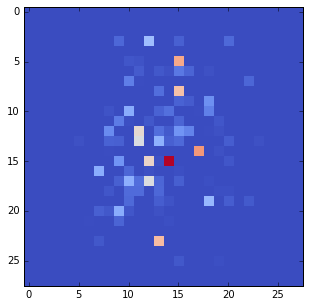

In [148]:
plt.figure(figsize=(5,5))
plt.imshow(tree_clf.feature_importances_.reshape(28,28), interpolation='nearest', cmap='coolwarm')
plt.show()

In [39]:
X[:,tree_clf.feature_importances_.argsort()[-99:]].shape

(42000, 99)

In [184]:
feature_importance = []

for max_depth in range(4, 32, 2):
    tree_clf = DecisionTreeClassifier(max_depth=max_depth)
    tree_clf.fit(X_train, Y_train)
    feature_importance.append(tree_clf.feature_importances_.reshape(28,28))
    
feature_importance = np.array(feature_importance)


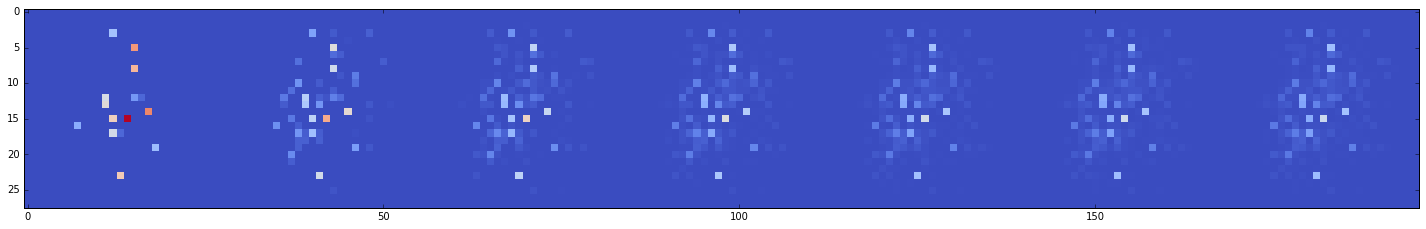

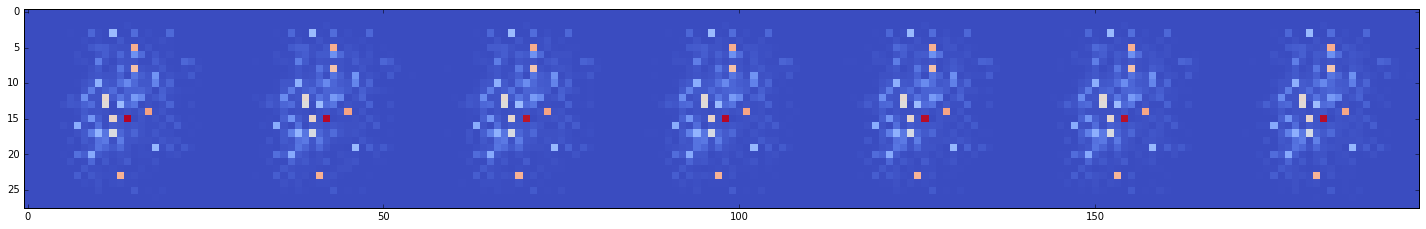

In [191]:
fi_4_18 = feature_importance[:7]
fi_18_31 = feature_importance[7:]
for fi in  [fi_4_18, fi_18_31]:
    plt.figure(figsize=(25,5))
    plt.imshow(
        fi.transpose(1,0, 2).reshape(28, 28*7),
        interpolation='nearest',
        cmap='coolwarm'
    )
    plt.show()


# Важность признаков для конкретного класса

In [193]:
_Y = np.copy(Y)

klass 0
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     19004
          1       0.91      0.91      0.91      1996

avg / total       0.98      0.98      0.98     21000



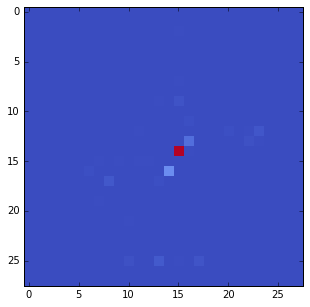

klass 1
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     18610
          1       0.94      0.93      0.93      2390

avg / total       0.99      0.99      0.99     21000



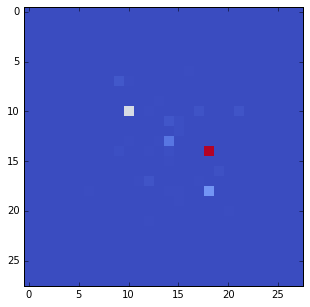

klass 2
             precision    recall  f1-score   support

          0       0.98      0.99      0.98     18894
          1       0.86      0.84      0.85      2106

avg / total       0.97      0.97      0.97     21000



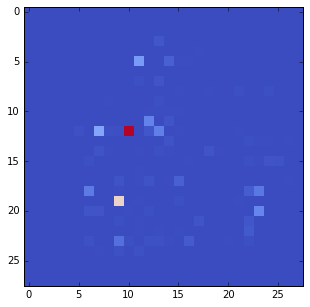

klass 3
             precision    recall  f1-score   support

          0       0.98      0.98      0.98     18819
          1       0.83      0.83      0.83      2181

avg / total       0.96      0.96      0.96     21000



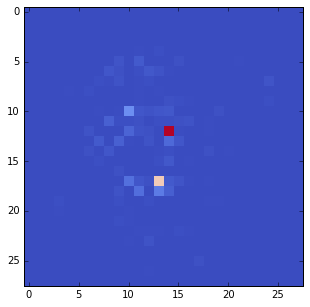

klass 4
             precision    recall  f1-score   support

          0       0.98      0.99      0.98     19007
          1       0.86      0.85      0.86      1993

avg / total       0.97      0.97      0.97     21000



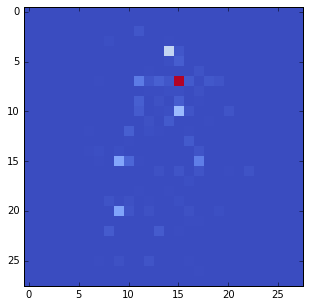

klass 5
             precision    recall  f1-score   support

          0       0.98      0.98      0.98     19112
          1       0.83      0.79      0.81      1888

avg / total       0.97      0.97      0.97     21000



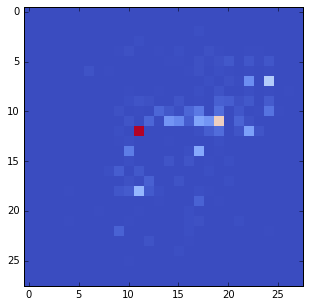

klass 6
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     18986
          1       0.91      0.89      0.90      2014

avg / total       0.98      0.98      0.98     21000



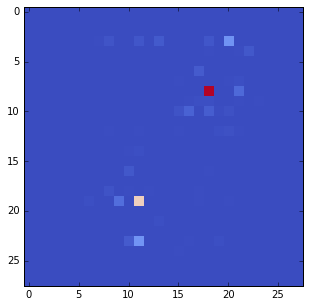

klass 7
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     18785
          1       0.88      0.88      0.88      2215

avg / total       0.97      0.97      0.97     21000



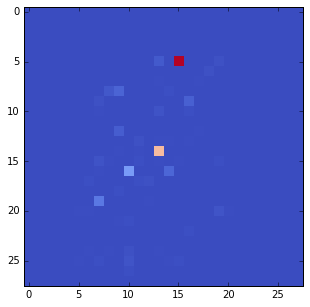

klass 8
             precision    recall  f1-score   support

          0       0.97      0.98      0.98     18952
          1       0.78      0.74      0.76      2048

avg / total       0.95      0.95      0.95     21000



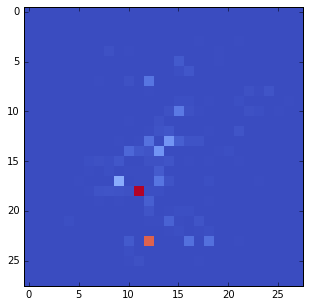

klass 9
             precision    recall  f1-score   support

          0       0.98      0.98      0.98     18847
          1       0.83      0.80      0.82      2153

avg / total       0.96      0.96      0.96     21000



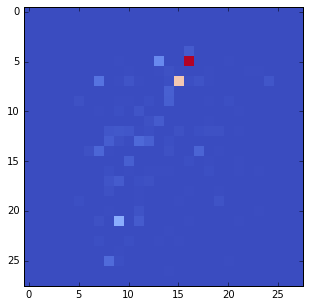

In [198]:
for klass in range(10):
    _Y = np.copy(Y)
    _Y[Y==klass] = 1
    _Y[Y!=klass] = 0
    X_train, X_test, Y_train, Y_test = train_test_split(X, _Y, test_size=0.5)
    
    tree_clf = DecisionTreeClassifier(max_depth=None, class_weight={1:9, 0:1})
    tree_clf.fit(X_train, Y_train)
    Y_pred = tree_clf.predict(X_test)
    
    print('klass', klass)
    print(classification_report(y_true=Y_test, y_pred=Y_pred))
    plt.figure(figsize=(5,5))
    plt.imshow(tree_clf.feature_importances_.reshape(28,28), interpolation='nearest', cmap='coolwarm')
    plt.show()
    print('='*80)

klass 0
0.948944535265
0.949881413079


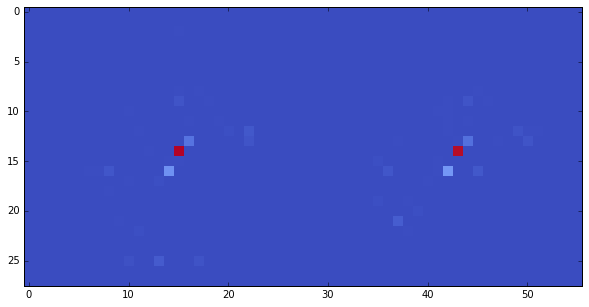

klass 1
0.958102481656
0.968329873287


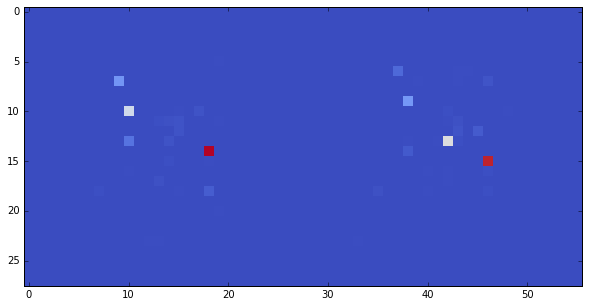

klass 2
0.909832526079
0.907913362219


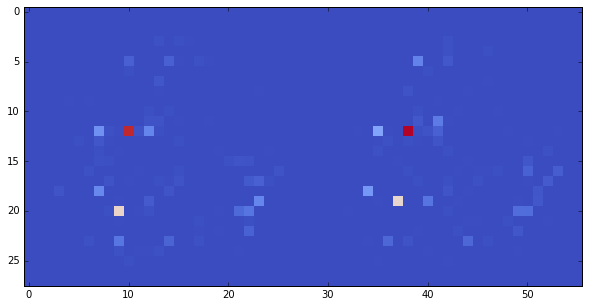

klass 3
0.89424559543
0.897440265602


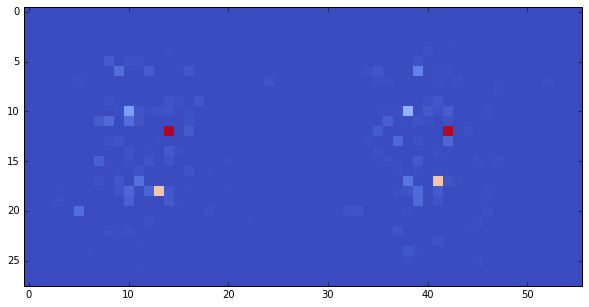

klass 4
0.92056923585
0.898799008417


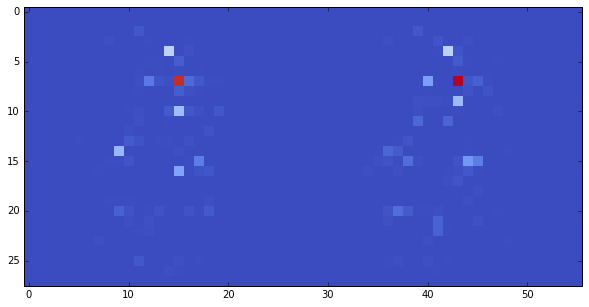

klass 5
0.912136116799
0.886527292017


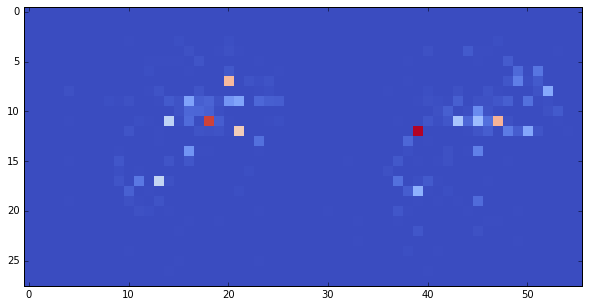

klass 6
0.941526206586
0.948848282979


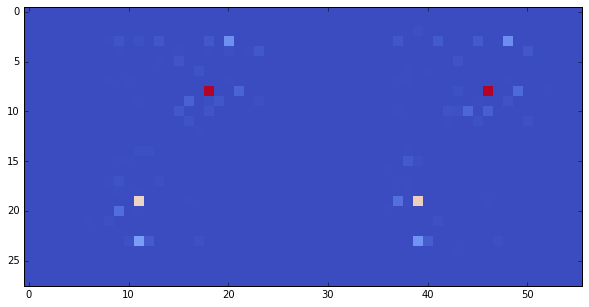

klass 7
0.930297469994
0.938439618773


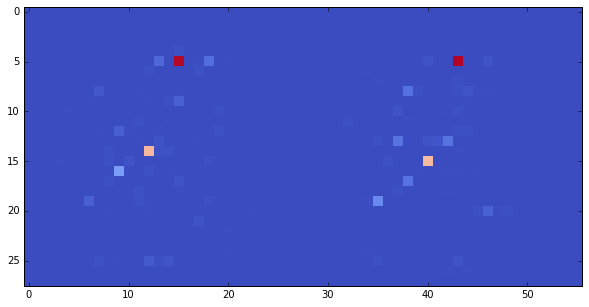

klass 8
0.887456033248
0.866798193687


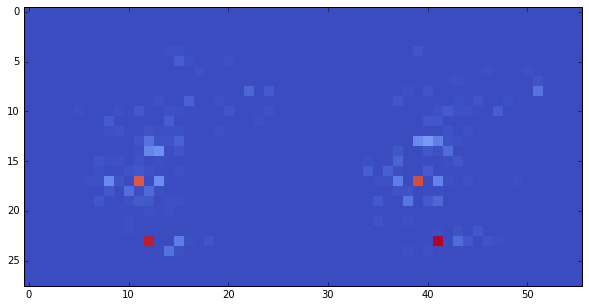

klass 9
0.890914888396
0.885790120407


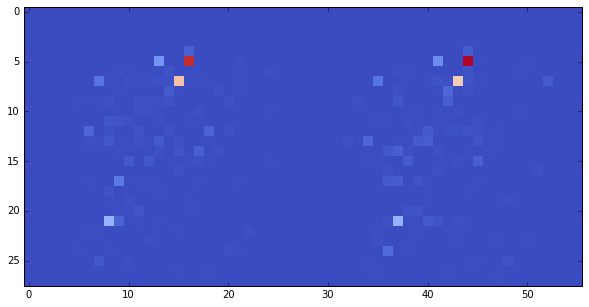

In [203]:
# roc_auc_score
for klass in range(10):
    _Y = np.copy(Y)
    _Y[Y==klass] = 1
    _Y[Y!=klass] = 0
    X_train, X_test, Y_train, Y_test = train_test_split(X, _Y, test_size=0.5)
    
    tree_clf = DecisionTreeClassifier(max_depth=None, class_weight={1:9, 0:1})
    tree_clf.fit(X_train, Y_train)
    Y_pred_proba = tree_clf.predict_proba(X_test)

    print('klass', klass)
    print(roc_auc_score(y_true=Y_test, y_score=Y_pred_proba[:,1]))
    train_feature = tree_clf.feature_importances_.reshape(28,28)
    
    tree_clf = DecisionTreeClassifier(max_depth=None, class_weight={1:9, 0:1})
    tree_clf.fit(X_test, Y_test)
    Y_pred_proba = tree_clf.predict_proba(X_train)
    test_feature = tree_clf.feature_importances_.reshape(28,28)
    print(roc_auc_score(y_true=Y_train, y_score=Y_pred_proba[:,1]))
    
    fi = np.array([train_feature, test_feature])
    
    
    plt.figure(figsize=(10,5))
    plt.imshow(fi.transpose(1,0, 2).reshape(28, 28*2), interpolation='nearest', cmap='coolwarm')
    plt.show()
    print('='*80)

# Отбор признаков

In [208]:
from sklearn.feature_selection import VarianceThreshold

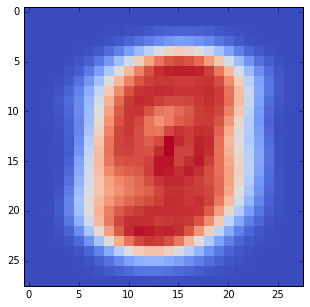

In [226]:
sel = VarianceThreshold(threshold=0.01)
_X = sel.fit_transform(X)
plt.figure(figsize=(5,5))
plt.imshow(sel.variances_.reshape(28,28), interpolation='nearest', cmap='coolwarm')
plt.show()

In [230]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2, mutual_info_classif

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 139 140 141 168 196 392 420 421 448 476 532 560 644 645
 671 672 673 699 700 701 727 728 729 730 731 754 755 756 757 758 759 760
 780 781 782 783] are constant.
  UserWarning)
/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


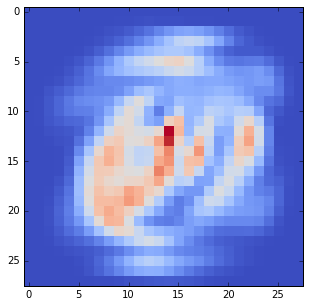

In [247]:
sel = SelectKBest(f_classif, k=784)
sel.fit(X, Y)
plt.figure(figsize=(5,5))
plt.imshow(np.nan_to_num(sel.scores_).reshape(28,28), interpolation='nearest', cmap='coolwarm')
plt.show()

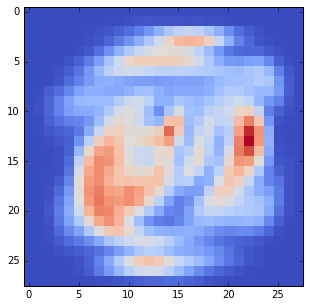

In [245]:
sel = SelectKBest(chi2, k=784)
sel.fit(X, Y)
plt.figure(figsize=(5,5))
plt.imshow(np.nan_to_num(sel.scores_).reshape(28,28), interpolation='nearest', cmap='coolwarm')
plt.show()

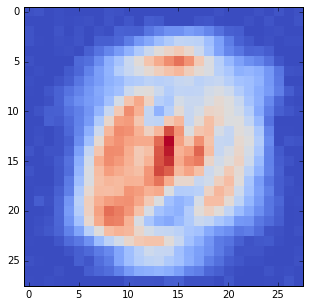

In [246]:
sel = SelectKBest(mutual_info_classif, k=784)
sel.fit(X, Y)
plt.figure(figsize=(5,5))
plt.imshow(np.nan_to_num(sel.scores_).reshape(28,28), interpolation='nearest', cmap='coolwarm')
plt.show()

In [151]:
path = tree_clf.decision_path([X_train[0]])

In [152]:
n_nodes = tree_clf.tree_.node_count
children_left = tree_clf.tree_.children_left
children_right = tree_clf.tree_.children_right
feature = tree_clf.tree_.feature
threshold = tree_clf.tree_.threshold
leafs_value = tree_clf.tree_.value

In [205]:
# children_left

In [204]:
# children_right

In [206]:
# feature 

In [156]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "  ", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "  ",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 251 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 409] <= 0.5 else to node 128.
  node=1 test node: go to node 2 if X[:, 434] <= 0.5 else to node 65.
    node=2 test node: go to node 3 if X[:, 455] <= 5.5 else to node 34.
      node=3 test node: go to node 4 if X[:, 352] <= 5.0 else to node 19.
        node=4 test node: go to node 5 if X[:, 517] <= 15.5 else to node 12.
          node=5 test node: go to node 6 if X[:, 184] <= 4.5 else to node 9.
            node=6 test node: go to node 7 if X[:, 570] <= 4.5 else to node 8.
              node=7 leaf node.
              node=8 leaf node.
            node=9 test node: go to node 10 if X[:, 433] <= 47.5 else to node 11.
              node=10 leaf node.
              node=11 leaf node.
          node=12 test node: go to node 13 if X[:, 542] <= 35.5 else to node 16.
            node=13 test node: go to node 14 if X[:, 524] <= 5.0 else to node 15.
              node=14 leaf no

In [248]:
# # First let's retrieve the decision path of each sample. The decision_path
# # method allows to retrieve the node indicator functions. A non zero element of
# # indicator matrix at the position (i, j) indicates that the sample i goes
# # through the node j.

# node_indicator = tree_clf.decision_path([X_test[0]])

# # Similarly, we can also have the leaves ids reached by each sample.

# leave_id = tree_clf.apply([X_test[0]])

# # Now, it's possible to get the tests that were used to predict a sample or
# # a group of samples. First, let's make it for the sample.

# sample_id = 0
# node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
#                                     node_indicator.indptr[sample_id + 1]]



# print('Rules used to predict sample %s: ' % sample_id)
# for node_id in node_index:
#     if leave_id[sample_id] != node_id:
#         continue

#     if (X_test[0][feature[node_id]] <= threshold[node_id]):
#         threshold_sign = "<="
#     else:
#         threshold_sign = ">"

#     print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
#           % (node_id,
#              sample_id,
#              feature[node_id],
#              X_test[0][feature[node_id]],
#              threshold_sign,
#              threshold[node_id]))

# # For a group of samples, we have the following common node.
# sample_ids = [0, 1]
# common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
#                 len(sample_ids))

# common_node_id = np.arange(n_nodes)[common_nodes]

# print("\nThe following samples %s share the node %s in the tree"
#       % (sample_ids, common_node_id))
# print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

In [249]:
1

1

In [139]:
/(tree_clf.tree_.value[3].sum())

array([[ 0.26411076,  0.00745474,  0.10223642,  0.15228967,  0.00319489,
         0.2172524 ,  0.10117146,  0.11821086,  0.02342918,  0.01064963]])